In [104]:
# Imports
import sys
sys.path.append('../python/')
import time as t
import numpy as np
import scipy as sp
import scipy.interpolate as ip
import scipy.integrate as i
import matplotlib.pyplot as plt
import dataPython as dp

## Test Timing on Linspace

**Results:** Larger arrays take more time to generate. Array minimum and maximum has no significant effect.

In [25]:
#Small Array

start = t.time()
np.linspace(1,10,1)
end = t.time()

print(end-start)

0.0


In [34]:
#Moderate Array

start = t.time()
np.linspace(1,10,100)
end = t.time()

print(end-start)

0.0009996891021728516


In [31]:
#Moderate Array with Greater Maximum

start = t.time()
np.linspace(1,100,100)
end = t.time()

print(end-start)

0.0


In [33]:
#Moderate Array with Lower Minimum

start = t.time()
np.linspace(-10,10,100)
end = t.time()

print(end-start)

0.0


In [32]:
#Large Array

start = t.time()
np.linspace(0,1,10000000)
end = t.time()

print(end-start)

0.13899564743041992


## Test Timing on Quad
</br>

**Results:**
<li>Dblquad generally has lower error than quad.</li>
<li>For simple functions (defined in human terms), dblquad and quad have similar times.</li>
<li>Without interdependencies, dblquad and quad have similar times.</li>
<li>Non-simple functions take longer to run.</li>
<li>Similar functions take similar amounts of time regardless of interdependency.</li>
<li>For a non-simple function with interdependency, dblquad is much faster than quad.</li>
<li>Larger ranges take longer on non-simple functions.</li>
STILL TESTING.

In [75]:
#Functions to Use

f = lambda x,y: x**2+y**2
g = lambda x,y: np.exp(np.sin(np.cos(x)))**(1/x)*(1/y)**y

fx = lambda x: x**2
gx = lambda x: x**3

gfx = lambda x: fx - gx

In [76]:
#Use quad twice 
#no interdependency
#simple function
#short range

start = t.time()

I1 = lambda x: i.quad(f,0,1,args=(x,))[0]
I2 = i.quad(I1,0,1)
print(I2)

end = t.time()
print(end-start)

(0.6666666666666669, 7.401486830834379e-15)
0.0010006427764892578


In [77]:
#Use dblquad 
#no interdependency
#simple function
#short range

start = t.time()

I = i.dblquad(f,0,1,0,1)
print(I)

end = t.time()
print(end-start)

(0.6666666666666669, 1.4754810833321613e-14)
0.002000093460083008


In [78]:
#Use quad twice 
#with interdependency
#simple function
#short range

start = t.time()

I1 = lambda x: i.quad(f,0,1,args=(x**2-x**3,))[0]
I2 = i.quad(I1,0,1)
print(I2)

end = t.time()
print(end-start)

(0.3428571428571428, 3.806478941571964e-15)
0.0010004043579101562


In [79]:
#Use dblquad 
#with interdependency
#simple function
#short range

start = t.time()

I = i.dblquad(f,0,1,gx,fx)
print(I)

end = t.time()
print(end-start)

# Results aren't the same? Unsure if following syntax. But should be of similar complexities, so I'll move on for now.

(0.04761904761904763, 1.413989738305241e-15)
0.0009613037109375


In [80]:
#Use quad twice
#no interdependency
#non-simple function
#short range

start = t.time()

I1 = lambda x: i.quad(g,1,2,args=(x,))[0]
I2 = i.quad(I1,1,2)
print(I2)

end = t.time()
print(end-start)

(0.6354487733931761, 7.0548985919091765e-15)
0.0059964656829833984


In [84]:
#Use dblquad
#no interdependency
#non-simple function
#short range

start = t.time()

I = i.dblquad(g,1,2,1,2)
print(I)

end = t.time()
print(end-start)

(0.6354487733931761, 1.2299447727453188e-14)
0.005964756011962891


In [86]:
#Use quad twice
#with interdependency
#non-simple function
#short range

start = t.time()

I1 = lambda x: i.quad(g,1,2,args=(x**2-x**3,))[0]
I2 = i.quad(I1,1,2)
print(I2)

end = t.time()
print(end-start)

(5.260378288697257, 3.638422896301563e-11)
0.1249990463256836


In [87]:
#Use dblquad
#with interdependency
#non-simple function
#short range

start = t.time()

I = i.dblquad(g,1,2,gx,fx)
print(I)

end = t.time()
print(end-start)

(-0.5196904757076883, 1.0749544025535486e-08)
0.01700615882873535


In [88]:
###


#FOr me to see the split while I edit

############################

In [ ]:
#

In [89]:
#Use quad twice 
#no interdependency
#simple function
#large range

start = t.time()

I1 = lambda x: i.quad(f,0,1000,args=(x,))[0]
I2 = i.quad(I1,0,1000)
print(I2)

end = t.time()
print(end-start)

(666666666666.6666, 0.007401486830834377)
0.0010004043579101562


In [90]:
#Use dblquad 
#no interdependency
#simple function
#large range

start = t.time()

I = i.dblquad(f,0,1000,0,1000)
print(I)

end = t.time()
print(end-start)

(666666666666.6666, 0.007401486830834377)
0.001994609832763672


In [91]:
#Use quad twice 
#with interdependency
#simple function
#large range

start = t.time()

I1 = lambda x: i.quad(f,0,1000,args=(x**2-x**3,))[0]
I2 = i.quad(I1,0,1000)
print(I2)

end = t.time()
print(end-start)

(1.4252400952414285e+23, 1582334369.355985)
0.0020008087158203125


In [92]:
#Use dblquad 
#with interdependency
#simple function
#large range

start = t.time()

I = i.dblquad(f,0,1000,gx,fx)
print(I)

end = t.time()
print(end-start)

# Results aren't the same? Unsure if following syntax. But should be of similar complexities, so I'll move on for now.

(-3.3333333285880756e+28, 370074341014889.4)
0.001001596450805664


In [93]:
#Use quad twice
#no interdependency
#non-simple function
#large range

start = t.time()

I1 = lambda x: i.quad(g,1,2000,args=(x,))[0]
I2 = i.quad(I1,1,2000)
print(I2)

end = t.time()
print(end-start)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  


(8.992636506209626e-06, 7.945329714501896e-09)
1.2423148155212402


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  if __name__ == '__main__':


In [94]:
#Use dblquad
#no interdependency
#non-simple function
#large range

start = t.time()

I = i.dblquad(g,1,2000,1,2000)
print(I)

end = t.time()
print(end-start)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


(8.992636506209626e-06, 0.4007289845969808)
1.22694993019104


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


In [95]:
#Use quad twice
#with interdependency
#non-simple function
#large range

start = t.time()

I1 = lambda x: i.quad(g,1,2000,args=(x**2-x**3,))[0]
I2 = i.quad(I1,1,2000)
print(I2)

end = t.time()
print(end-start)

OverflowError: complex exponentiation

In [96]:
#Use dblquad
#with interdependency
#non-simple function
#large range

start = t.time()

I = i.dblquad(g,1,2000,gx,fx)
print(I)

end = t.time()
print(end-start)

(4.030123290037915e-05, 1.411714705912875e-08)
0.17000579833984375


In [97]:
######nother blank cell

In [ ]:
######Haven't set these infinite yet

In [76]:
#Use quad twice 
#no interdependency
#simple function
#infinite range

start = t.time()

I1 = lambda x: i.quad(f,0,1,args=(x,))[0]
I2 = i.quad(I1,0,1)
print(I2)

end = t.time()
print(end-start)

(0.6666666666666669, 7.401486830834379e-15)
0.0010006427764892578


In [77]:
#Use dblquad 
#no interdependency
#simple function
#infinite range

start = t.time()

I = i.dblquad(f,0,1,0,1)
print(I)

end = t.time()
print(end-start)

(0.6666666666666669, 1.4754810833321613e-14)
0.002000093460083008


In [78]:
#Use quad twice 
#with interdependency
#simple function
#infinite range

start = t.time()

I1 = lambda x: i.quad(f,0,1,args=(x**2-x**3,))[0]
I2 = i.quad(I1,0,1)
print(I2)

end = t.time()
print(end-start)

(0.3428571428571428, 3.806478941571964e-15)
0.0010004043579101562


In [79]:
#Use dblquad 
#with interdependency
#simple function
#infinite range

start = t.time()

I = i.dblquad(f,0,1,gx,fx)
print(I)

end = t.time()
print(end-start)

# Results aren't the same? Unsure if following syntax. But should be of similar complexities, so I'll move on for now.

(0.04761904761904763, 1.413989738305241e-15)
0.0009613037109375


In [80]:
#Use quad twice
#no interdependency
#non-simple function
#infinite range

start = t.time()

I1 = lambda x: i.quad(g,1,2,args=(x,))[0]
I2 = i.quad(I1,1,2)
print(I2)

end = t.time()
print(end-start)

(0.6354487733931761, 7.0548985919091765e-15)
0.0059964656829833984


In [84]:
#Use dblquad
#no interdependency
#non-simple function
#infinite range

start = t.time()

I = i.dblquad(g,1,2,1,2)
print(I)

end = t.time()
print(end-start)

(0.6354487733931761, 1.2299447727453188e-14)
0.005964756011962891


In [86]:
#Use quad twice
#with interdependency
#non-simple function
#infnite range

start = t.time()

I1 = lambda x: i.quad(g,1,2,args=(x**2-x**3,))[0]
I2 = i.quad(I1,1,2)
print(I2)

end = t.time()
print(end-start)

(5.260378288697257, 3.638422896301563e-11)
0.1249990463256836


In [1]:
#Use dblquad
#with interdependency
#non-simple function
#infinite range

start = t.time()

I = i.dblquad(g,1,2,gx,fx)
print(I)

end = t.time()
print(end-start)

NameError: name 't' is not defined

## White Space

**Results:** Reasonable amounts of blank space and comments make no discernable difference.

In [43]:
start = t.time()
end = t.time()
print(end-start)

0.0


## Multiple Cells

**Results:** 2 cells take approximately twice as long to run as one, even when they are equivalent to the one and the "Run selected cells" function is used to eliminate user reaction time.
</br>*Only tested with simple cells.*

In [38]:
start = t.time()

f = lambda x: x**2

In [39]:
print(i.quad(f,0,1))

end = t.time()
print(end-start)

(0.33333333333333337, 3.700743415417189e-15)
0.02102804183959961


In [40]:
start = t.time()

f = lambda x: x**2
print(i.quad(f,0,1))

end = t.time()
print(end-start)

(0.33333333333333337, 3.700743415417189e-15)
0.001001119613647461


## Splining vs Data Points
*This is also to check understanding of splines.*</br>
**Results:** 
<li>Spline is not visibly smoother than normal data.</li>
<li>No particular need to spline, but it isn't excessively bogging down the code.</li>
<li>Vectorizing adds significant amounts of time to plotting.</li>

In [73]:
#fakedata
x = [1,2,3,4,5,6,7,8,9]
y = [5,16,5,5,8,28,46,17,0.1]

In [74]:
f = ip.InterpolatedUnivariateSpline(x,y)

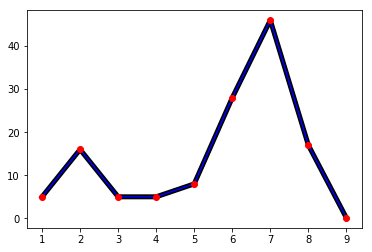

In [75]:
plt.plot(x,y,'k-',linewidth='5')
plt.plot(x,f(x),'b-')
plt.plot(x,np.vectorize(f)(x),'ro')

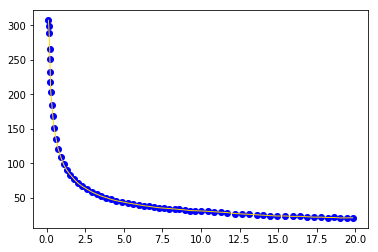

In [143]:
#Setup necessary for all options. Time: 3ms
data_bh = dp.getXYdata('../NGC5533/NGC5533-blackhole_fmt.txt')

r_bh = np.asarray(data_bh['xx'])
v_bh = np.asarray(data_bh['yy'])

#####setup necessary for f_v_bh. Time: <1ms
xmax=19
x = np.arange(0,xmax,0.1)

idx = np.arange(0,np.shape(r_bh)[0])
f_v_bh = ip.InterpolatedUnivariateSpline(r_bh[idx%1==0], v_bh[idx%1==0],)

####Actual plotting
#plt.plot(r_bh, np.vectorize(f_v_bh)(r_bh), 'bo') #time: 25ms (total: 29ms)
plt.plot(r_bh, f_v_bh(r_bh), 'bo')                      #time: 5ms (total: 9ms)
plt.plot(r_bh,v_bh,color='gold',linewidth=1,linestyle='-')                                  #time: 3ms (total: 8ms)

In [135]:
data=np.array(data_bh)
print(data)

{'xx': [0.1181, 0.1417, 0.1653, 0.2006, 0.2125, 0.2361, 0.2479, 0.2715, 0.3424, 0.4014, 0.4841, 0.6139, 0.7438, 0.9209, 1.098, 1.3105, 1.5348, 1.7473, 2.0425, 2.314, 2.6328, 2.9516, 3.2468, 3.5419, 3.8725, 4.1795, 4.51, 4.8996, 5.2656, 5.6198, 5.9622, 6.3046, 6.6352, 6.9303, 7.2609, 7.6151, 7.9575, 8.2999, 8.6068, 8.9492, 9.2798, 9.6221, 10.0118, 10.4368, 10.8618, 11.2869, 11.7119, 12.1842, 12.6564, 13.1287, 13.6009, 14.026, 14.4746, 14.9468, 15.4191, 15.9386, 16.4344, 16.8831, 17.3317, 17.7804, 18.2054, 18.6305, 19.0319, 19.4569, 19.8347], 'yy': [307.3345, 298.4243, 288.8283, 265.1773, 251.465, 231.9262, 217.1854, 203.1323, 184.9729, 168.8688, 151.3973, 135.6481, 121.2704, 108.9579, 98.7025, 89.8247, 83.3488, 77.8995, 71.093, 66.6824, 62.2799, 58.2203, 55.1852, 52.4929, 50.1496, 47.8022, 45.8016, 44.1542, 42.5027, 41.192, 39.8792, 38.5665, 37.5946, 36.6166, 35.6447, 35.0197, 34.3927, 33.7657, 33.1326, 32.5056, 31.5337, 31.2495, 30.9735, 30.3606, 29.7477, 29.1349, 28.522, 27.2316, 26.6